In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm
import time
import itertools

In [3]:
datasetPath = "./dataset/dataku.txt"
dataset = np.loadtxt(datasetPath, delimiter=" ")
k = 2 
iterationCounter = 0
input = dataset

def initCentroid(dataIn, k):
    result = dataIn[np.random.choice(dataIn.shape[0], k, replace=False)]
    return result

In [4]:
def plotClusterResult(listClusterMembers, centroid, iteration, converged):
    n = listClusterMembers.__len__()
    color = iter(cm.rainbow(np.linspace(0, 1, n)))
    plt.figure("result")
    plt.clf()
    plt.title("iteration-" +iteration)
    marker = itertools.cycle((".", "*", "^", "x", "+"))
    for i in range(n):
        col = next(color)
        memberCluster = np.asmatrix(listClusterMembers[i])
        plt.scatter(np.ravel(memberCluster[:, 0]), np.ravel(memberCluster[:, 1]),
                    marker=marker.__next__(), s=100, c=col, label="klaster-"+str(i+1))
    for i in range(n):
        plt.scatter((centroid[i, 0]), (centroid[i, 1]), marker=marker.__next__()
                    , c=col, label="centroid-" + str(i+1))
    if(converged == 0):
        plt.legend()
        plt.ion()
        plt.show()
        plt.pause(0.1)
    if(converged == 1):
        plt.legend()
        plt.show(block=True)

In [5]:
def kMeans(data, centroidInit):
    nCluster = k 
    global iterationCounter
    centroidInit = np.matrix(centroidInit)
    while(True):
        iterationCounter +=1
        euclideanMatrixAllCluster = np.ndarray(shape=(data.shape[0], 0))
        for i in range(0, nCluster):
            centroidRepeated = np.repeat(centroidInit[i,:], data.shape[0], axis=0)
            deltaMatrix = abs(np.subtract(data,centroidRepeated))
            euclideanMatrix = np.sqrt(np.square(deltaMatrix).sum(axis=1))
            euclideanMatrixAllCluster = \
                np.concatenate((euclideanMatrixAllCluster, euclideanMatrix), axis=1)
        clusterMatrix = np.ravel(np.argmin(np.matrix(euclideanMatrixAllCluster), axis=1))
        listClusterMember = [[] for i in range(k)]
        for i in range(0, data.shape[0]):#assign data to cluster regarding cluster matrix
            listClusterMember[clusterMatrix[i]].append(data[i, :])
        newCentroid = np.ndarray(shape=(0, centroidInit.shape[1]))
        for i in range(0,nCluster):
            memberCluster = np.asmatrix(listClusterMember[i])
            centroidCluster = memberCluster.mean(axis=0)
            newCentroid = np.concatenate((newCentroid, centroidCluster), axis=0)
        print("iter: ", iterationCounter)
        print("centroid: ", newCentroid)
        if((centroidInit == newCentroid).all()):
            break
        centroidInit = newCentroid
        plotClusterResult(listClusterMember, centroidInit, str(iterationCounter), 0)
        time.sleep(1) #diberi jeda 1 detik agak hasil plot klaster nyaman dilihat
    return listClusterMember, centroidInit

iter:  1
centroid:  [[-0.73267439 -2.0620064 ]
 [ 1.32992917  9.78928194]]


/tmp/ipykernel_43658/511695296.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(np.ravel(memberCluster[:, 0]), np.ravel(memberCluster[:, 1]),
/tmp/ipykernel_43658/511695296.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter((centroid[i, 0]), (centroid[i, 1]), marker=marker.__next__()


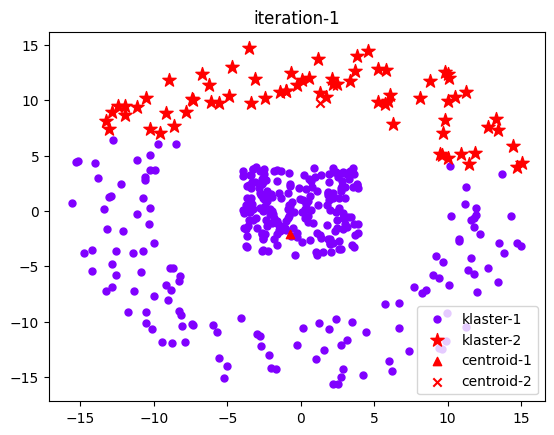

iter:  2
centroid:  [[-0.87148846 -2.37289423]
 [ 1.44706932  8.73674091]]


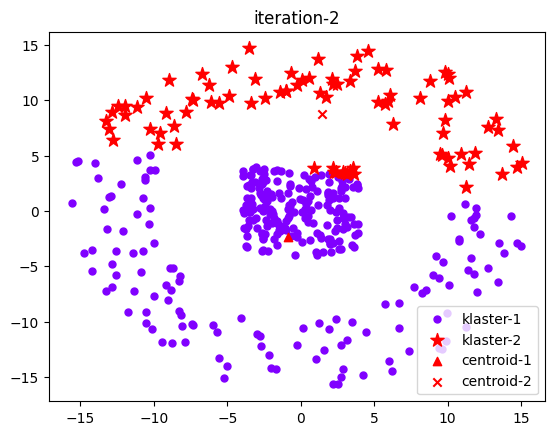

iter:  3
centroid:  [[-0.96171616 -2.65784108]
 [ 1.36958641  7.94047573]]


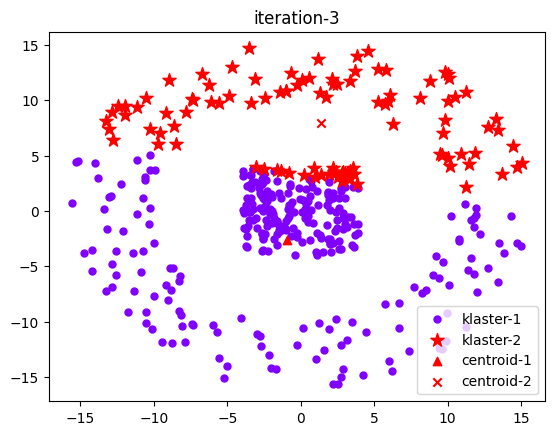

iter:  4
centroid:  [[-1.13056989 -2.99566559]
 [ 1.41212149  7.14281736]]


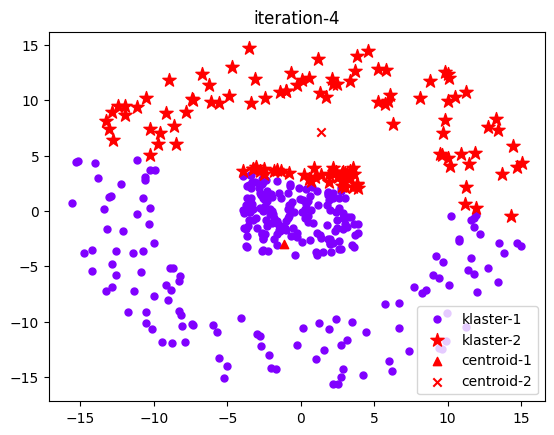

iter:  5
centroid:  [[-1.28434656 -3.32023588]
 [ 1.3908442   6.51008696]]


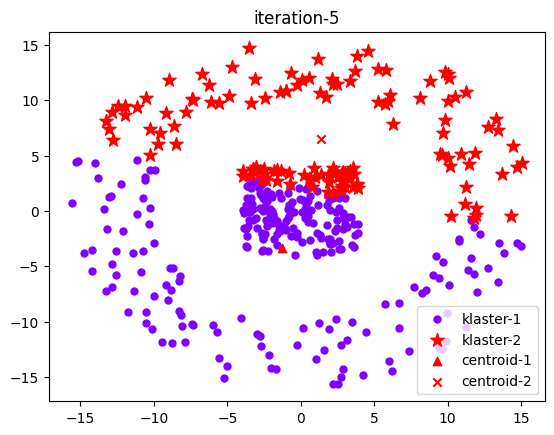

iter:  6
centroid:  [[-1.45926194 -3.61367692]
 [ 1.41095033  6.0200549 ]]


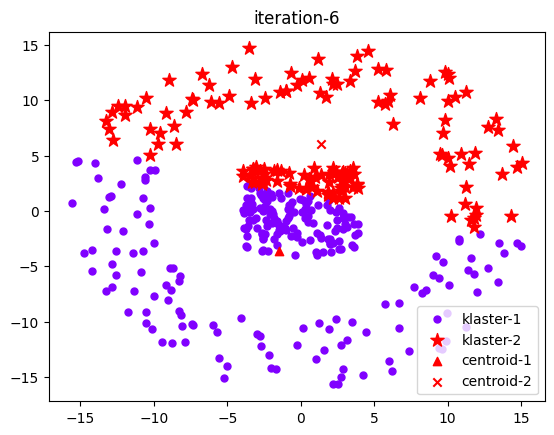

iter:  7
centroid:  [[-1.62426008 -3.77052059]
 [ 1.49389877  5.71527222]]


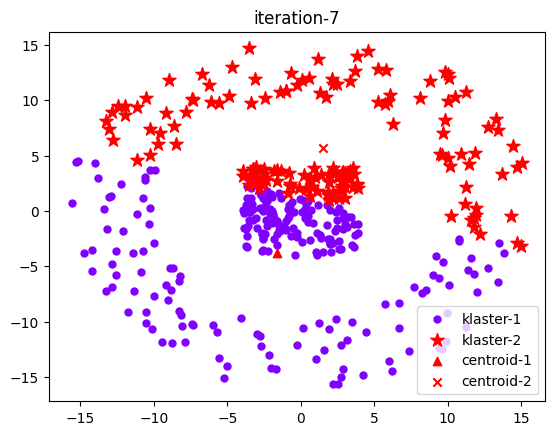

iter:  8
centroid:  [[-1.82567105 -3.94261667]
 [ 1.57959709  5.3919    ]]


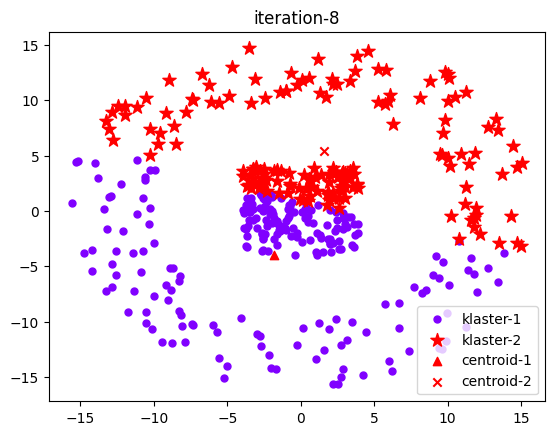

iter:  9
centroid:  [[-2.06345826 -4.10712156]
 [ 1.67731648  5.07605879]]


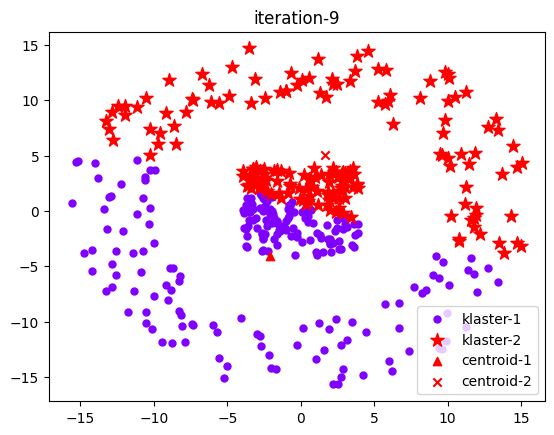

iter:  10
centroid:  [[-2.1787981  -4.26845333]
 [ 1.64729105  4.86771263]]


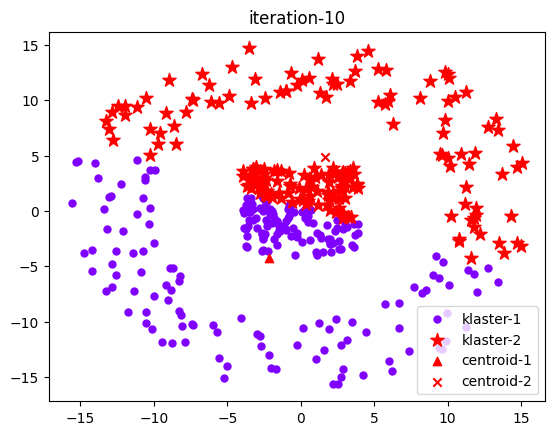

iter:  11
centroid:  [[-2.36516881 -4.40717723]
 [ 1.68283737  4.64010101]]


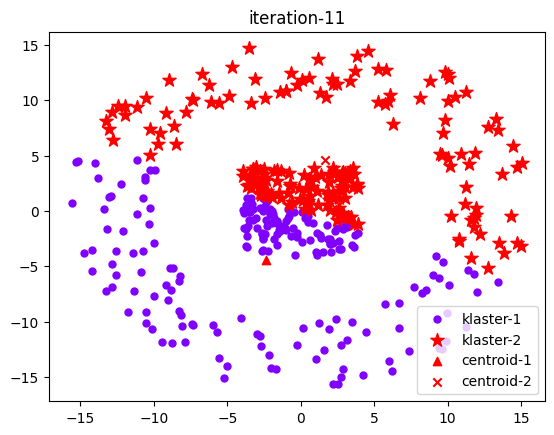

iter:  12
centroid:  [[-2.48657716 -4.49345685]
 [ 1.70095271  4.50099113]]


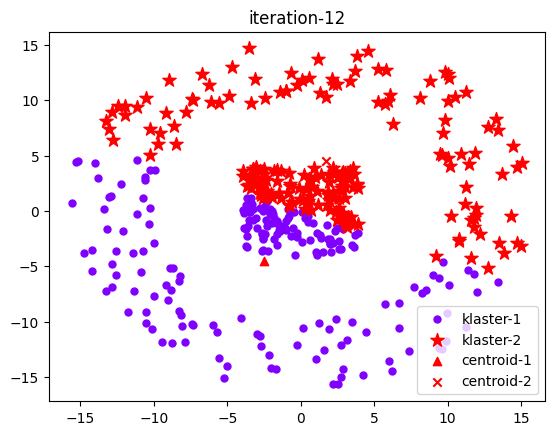

iter:  13
centroid:  [[-2.72055759 -4.55888063]
 [ 1.79456555  4.30256651]]


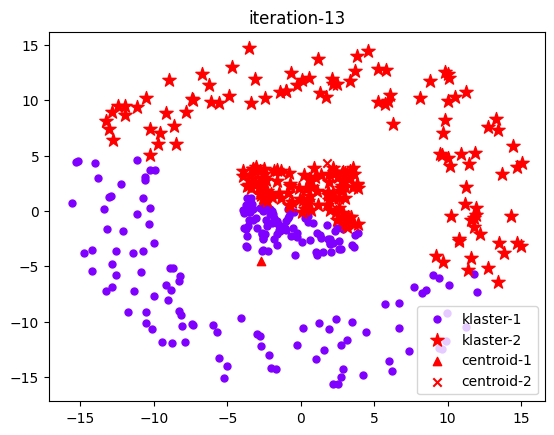

iter:  14
centroid:  [[-3.00864309 -4.72997403]
 [ 1.82649361  4.03934018]]


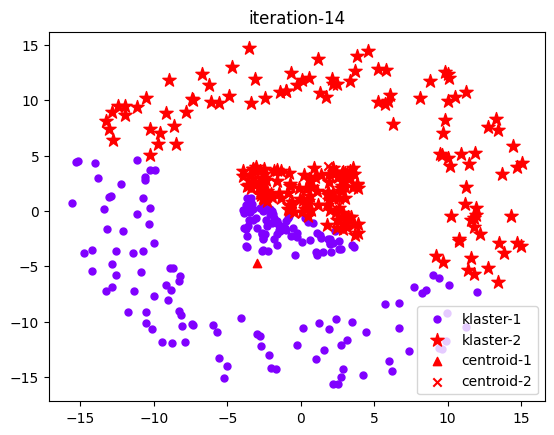

iter:  15
centroid:  [[-3.07875899 -4.78953539]
 [ 1.81737297  3.96859234]]


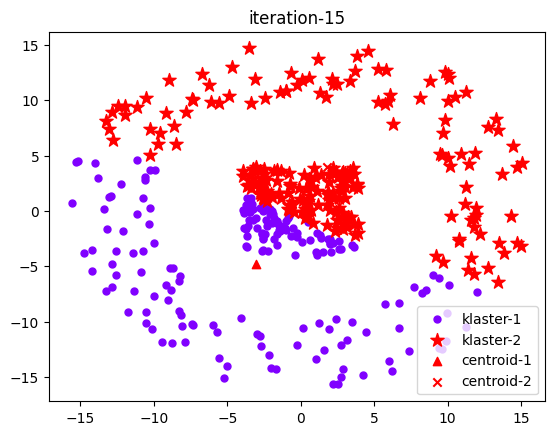

iter:  16
centroid:  [[-3.307952   -4.761768  ]
 [ 1.93035244  3.83022044]]


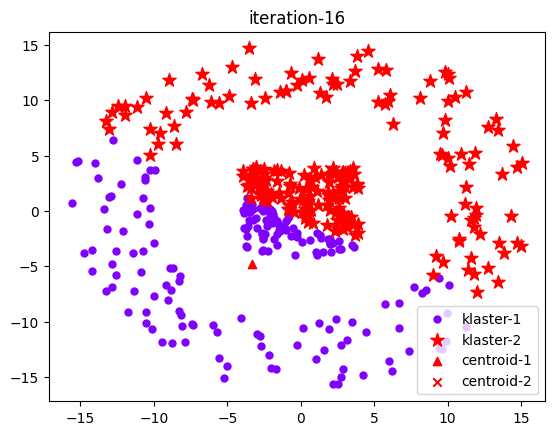

iter:  17
centroid:  [[-3.49773506 -4.68690977]
 [ 2.05329027  3.73456858]]


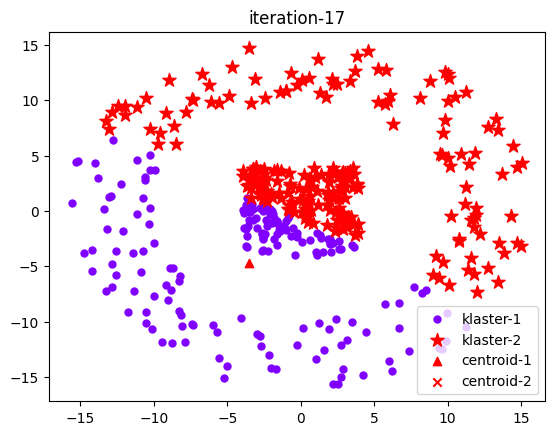

iter:  18
centroid:  [[-3.6330408  -4.60108908]
 [ 2.15746372  3.66849425]]


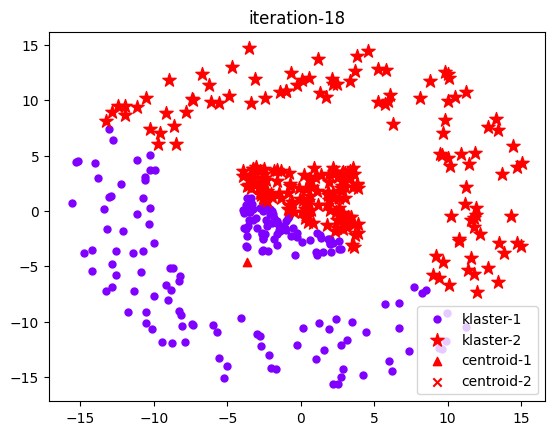

iter:  19
centroid:  [[-3.7239477  -4.53877644]
 [ 2.22745398  3.62051903]]


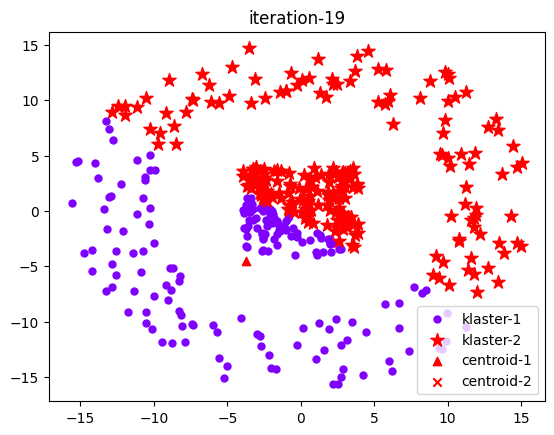

iter:  20
centroid:  [[-3.82886954 -4.4631431 ]
 [ 2.30823451  3.56228805]]


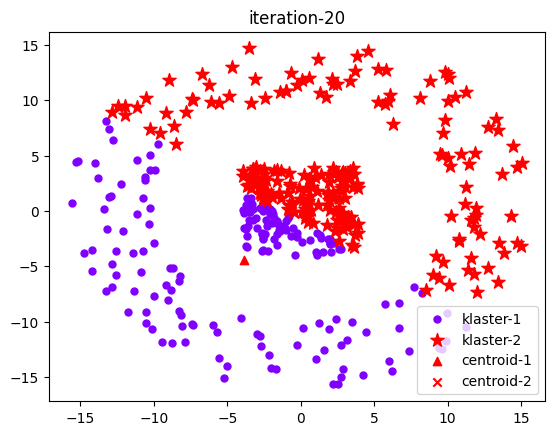

iter:  21
centroid:  [[-3.92966047 -4.46063023]
 [ 2.33043553  3.48999386]]


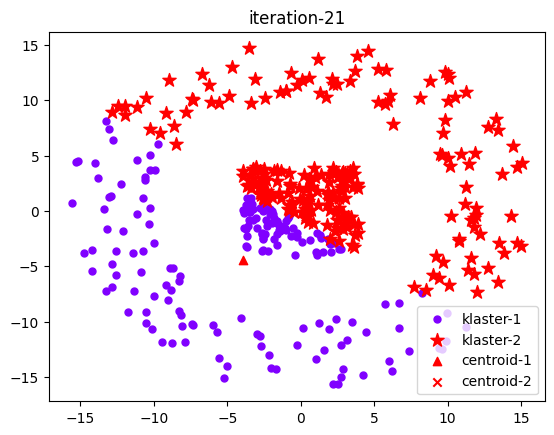

iter:  22
centroid:  [[-4.10684588 -4.39900706]
 [ 2.40696304  3.37531043]]


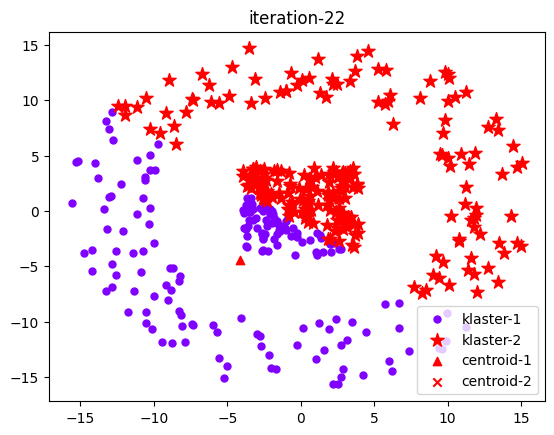

iter:  23
centroid:  [[-4.47743212 -4.2958103 ]
 [ 2.52857021  3.13744213]]


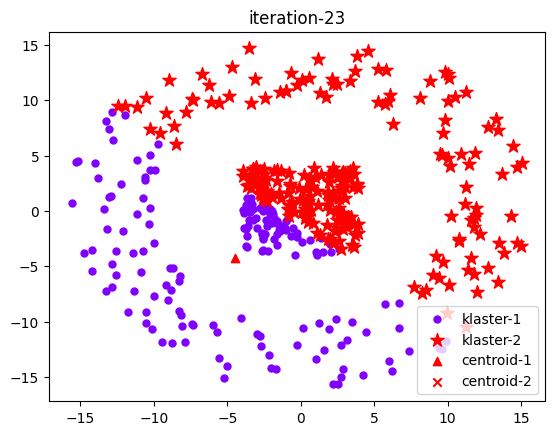

iter:  24
centroid:  [[-4.8398     -3.98090788]
 [ 2.78299872  2.91634043]]


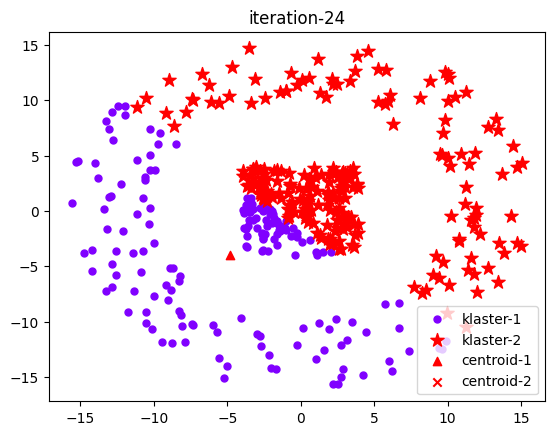

iter:  25
centroid:  [[-5.07925    -3.6907494 ]
 [ 2.98544103  2.73997692]]


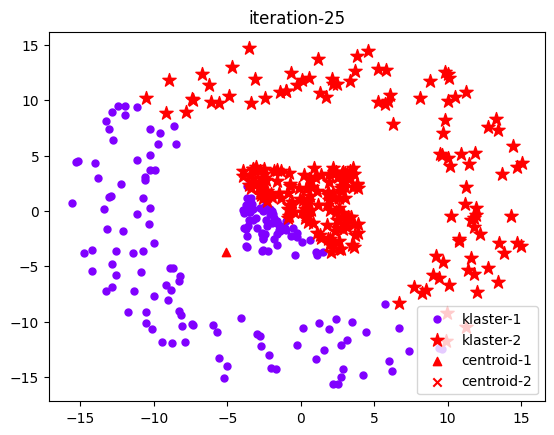

iter:  26
centroid:  [[-5.29129649 -3.22151579]
 [ 3.31986638  2.52999738]]


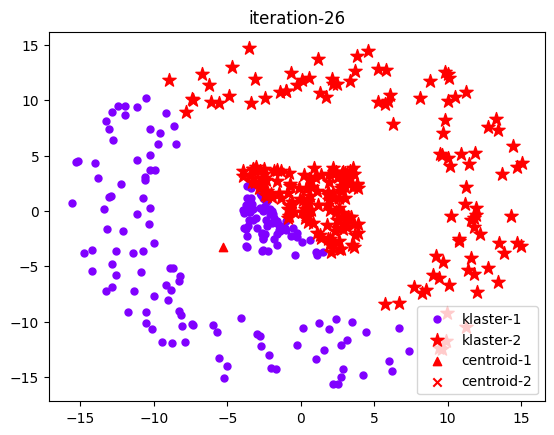

iter:  27
centroid:  [[-5.39570282 -2.78498023]
 [ 3.63442646  2.33825874]]


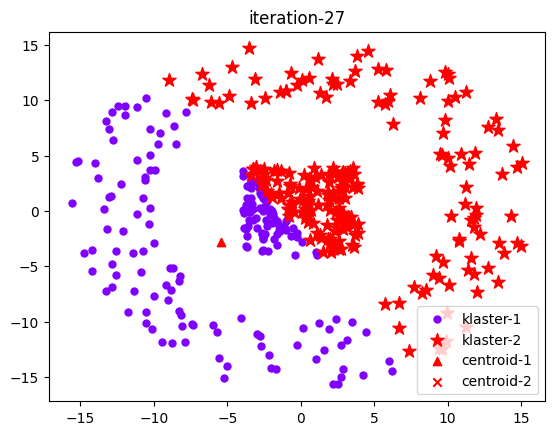

iter:  28
centroid:  [[-5.29532804 -2.33301852]
 [ 4.05807915  2.22479005]]


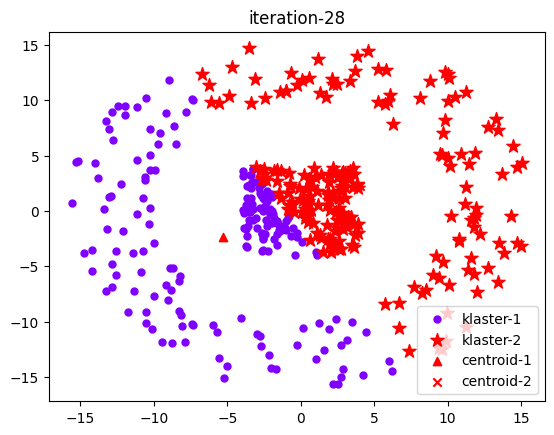

iter:  29
centroid:  [[-5.18099314 -1.73820784]
 [ 4.65489949  1.95451327]]


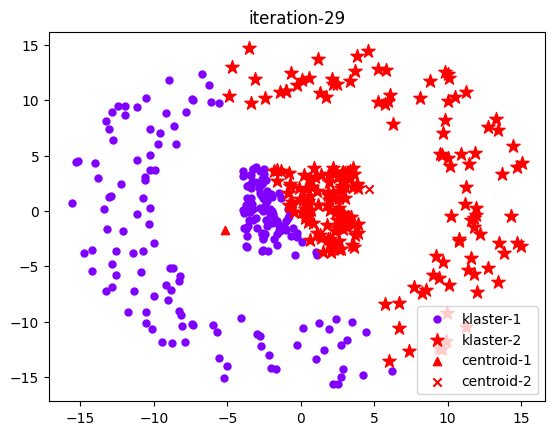

iter:  30
centroid:  [[-5.11201848 -1.47686114]
 [ 4.94218836  1.7995127 ]]


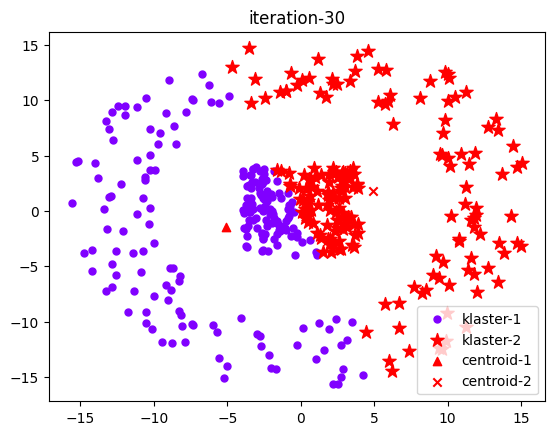

iter:  31
centroid:  [[-5.10804953 -1.26918551]
 [ 5.09978656  1.61341882]]


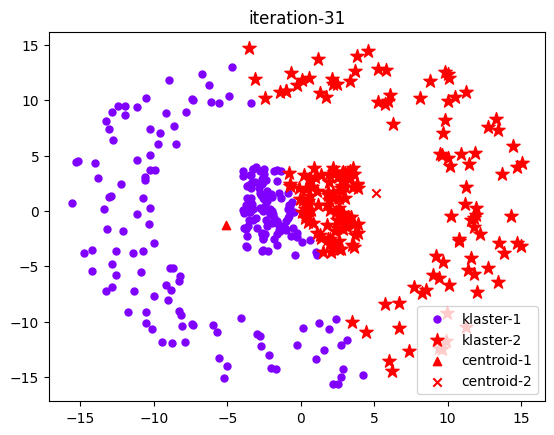

iter:  32
centroid:  [[-5.11078698 -1.17276186]
 [ 5.15814541  1.51694054]]


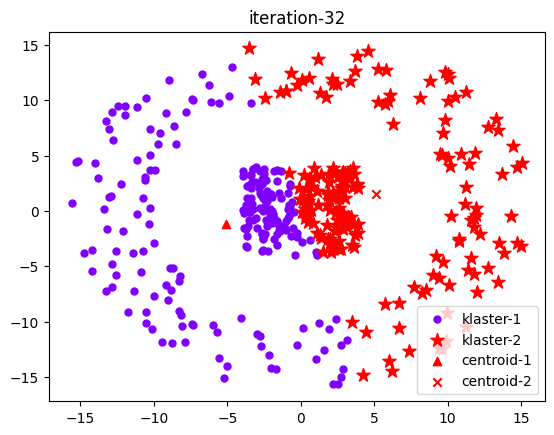

iter:  33
centroid:  [[-5.14449442 -1.04642884]
 [ 5.19731892  1.37012108]]


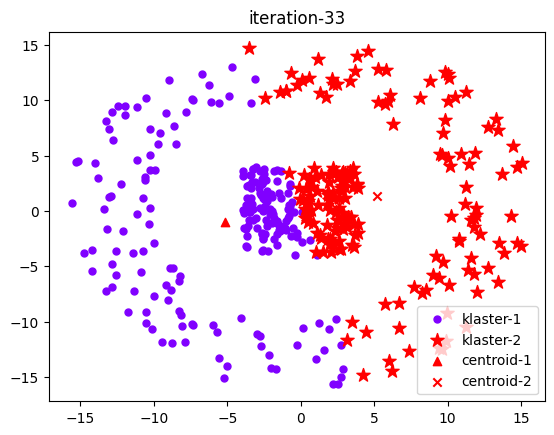

iter:  34
centroid:  [[-5.16821111 -0.84674954]
 [ 5.28136576  1.14884837]]


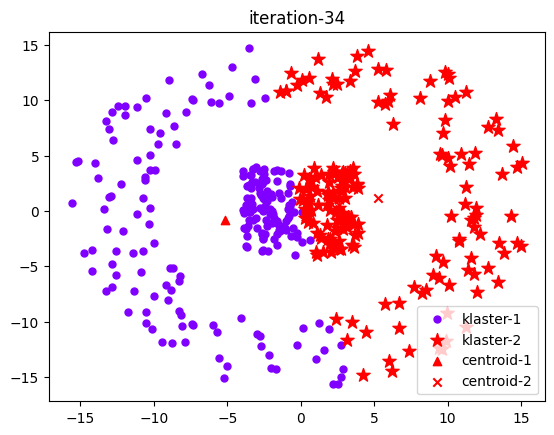

iter:  35
centroid:  [[-5.27040423 -0.72261549]
 [ 5.23012727  0.97544011]]


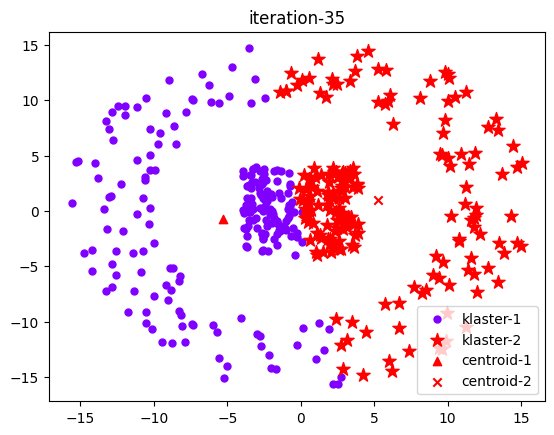

iter:  36
centroid:  [[-5.40625407 -0.53759426]
 [ 5.1588733   0.73742094]]


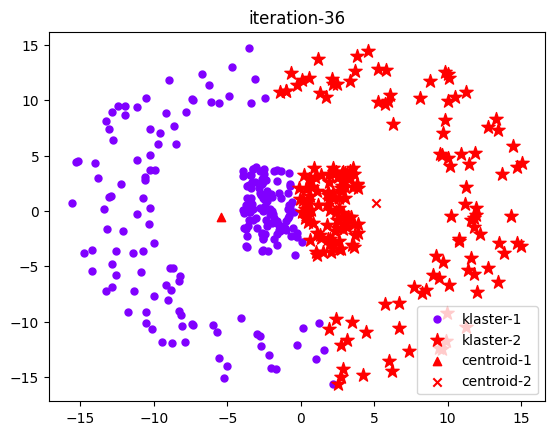

iter:  37
centroid:  [[-5.50949417 -0.35913398]
 [ 5.10512113  0.52820515]]


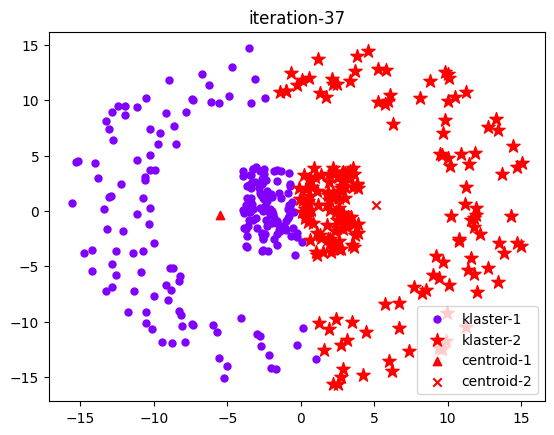

iter:  38
centroid:  [[-5.54854732 -0.22940976]
 [ 5.09174308  0.38727795]]


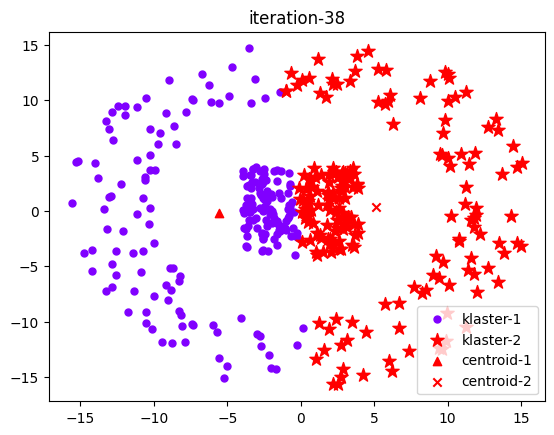

iter:  39
centroid:  [[-5.50459372 -0.12275121]
 [ 5.15486321  0.27927306]]


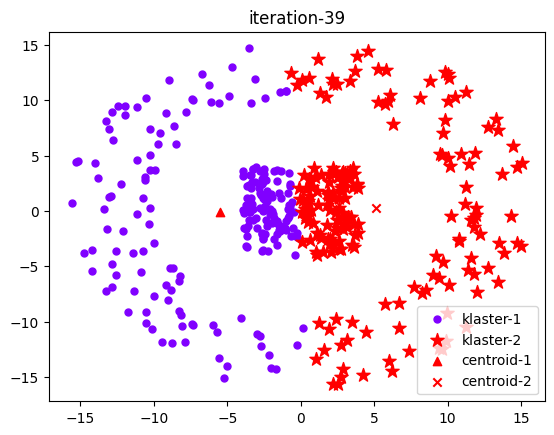

iter:  40
centroid:  [[-5.48137404 -0.0621601 ]
 [ 5.18522656  0.21572656]]


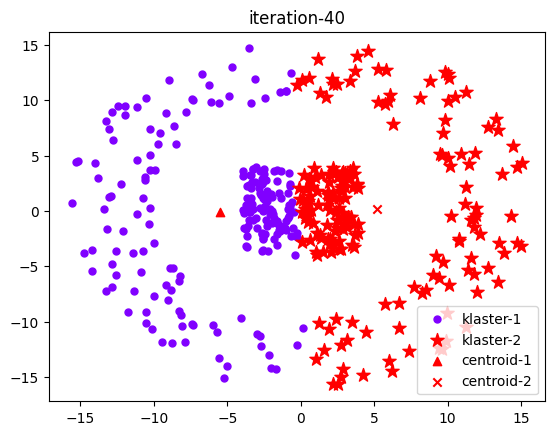

iter:  41
centroid:  [[-5.50860966 -0.01145459]
 [ 5.15917047  0.15990311]]


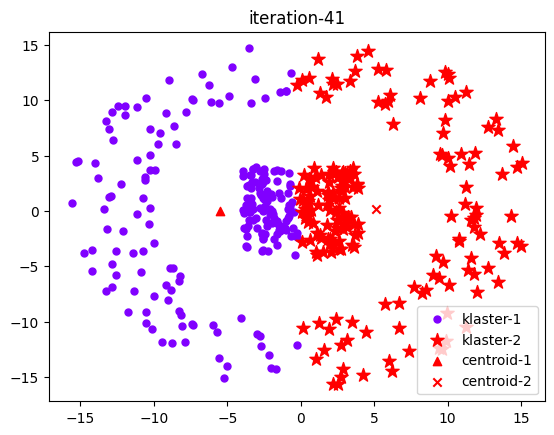

iter:  42
centroid:  [[-5.50860966 -0.01145459]
 [ 5.15917047  0.15990311]]


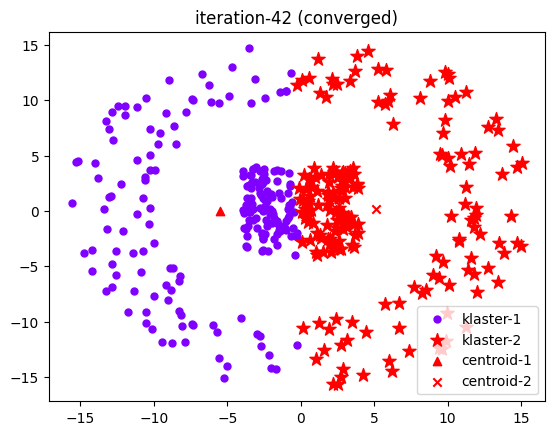

In [6]:
centroidInit = initCentroid(input, k)
clusterResults, centroid = kMeans(input, centroidInit)
plotClusterResult(clusterResults, centroid, str(iterationCounter) + " (converged)", 1)